# Proyek Analisis Data: Bike Sharing Dataset 
- Nama: Yulia Harni
- Email: yuliaharni63@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana trends pada bike rentals by month, day, and hour?
- Apakah terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda pada musim tertentu?
- Bagaimana insight dari analisis RFM?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots

## Data Wrangling

### Gathering Data

In [11]:
df_day = pd.read_csv('https://github.com/yuliaharni/submission/blob/main/data/day.csv?raw=true')
df_hour = pd.read_csv('https://github.com/yuliaharni/submission/blob/main/data/hour.csv?raw=true')

In [12]:
df_day .head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [14]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
# Display summary statistics
print(df_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [16]:
# identifikasi missing value
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
# Check for duplicates
print(df_day.duplicated().sum())

# Remove duplicates
df_day = df_day.drop_duplicates()

0


In [18]:
# Display data types of each column
print(df_day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [19]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
# Display summary statistics
print(df_hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [21]:
# identifikasi missing value
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
# Check for duplicates
print(df_day.duplicated().sum())

# Remove duplicates
df_day = df_day.drop_duplicates()

0


In [23]:
# Display data types of each column
print(df_hour.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Menggabungakan kedua dataset

In [24]:
all_data = df_day.merge(df_hour, on='dteday', how='inner', suffixes=('_day', '_hour'))
print(all_data.shape)

(17379, 32)


In [25]:
all_data.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Cleaning Data

In [26]:
#correct datatype
all_data['dteday'] = pd.to_datetime(all_data['dteday'])

# Verify the changes
print(all_data.dtypes)

instant_day                 int64
dteday             datetime64[ns]
season_day                  int64
yr_day                      int64
mnth_day                    int64
holiday_day                 int64
weekday_day                 int64
workingday_day              int64
weathersit_day              int64
temp_day                  float64
atemp_day                 float64
hum_day                   float64
windspeed_day             float64
casual_day                  int64
registered_day              int64
cnt_day                     int64
instant_hour                int64
season_hour                 int64
yr_hour                     int64
mnth_hour                   int64
hr                          int64
holiday_hour                int64
weekday_hour                int64
workingday_hour             int64
weathersit_hour             int64
temp_hour                 float64
atemp_hour                float64
hum_hour                  float64
windspeed_hour            float64
casual_hour   

## Exploratory Data Analysis (EDA) 

In [27]:
# Display basic statistics of the 'cnt_hour' column (total rental bikes) over time
hourly_stats = all_data.groupby('hr')['cnt_hour'].describe()

# Display basic statistics of the 'cnt_day' column (total rental bikes) over days
daily_stats = all_data.groupby('dteday')['cnt_day'].describe()

# Display basic statistics of the 'cnt_day' column (total rental bikes) over months
monthly_stats = all_data.groupby('mnth_hour')['cnt_day'].describe()

# Print the results
print("Hourly Statistics:")
print(hourly_stats)

print("\nDaily Statistics:")
print(daily_stats)

print("\nMonthly Statistics:")
print(monthly_stats)


Hourly Statistics:
    count        mean         std   min     25%    50%     75%    max
hr                                                                   
0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
1   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
2   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
3   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
4   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
5   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
6   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
7   727.0  212.064649  161.441936   1.0   55.50  208.0  332.00  596.0
8   727.0  359.011004  235.189285   5.0  131.50  385.0  559.50  839.0
9   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
10  727.0  173.668501  102.205413   8.0  106.00  147.0  218.00  539.0
11  727.0  208.143054  127.495536  10.0  123.00  180.0  256.00  663.0
1

In [28]:
# Filter the dataset for each season and calculate aggregate statistics
seasonal_analysis = all_data.groupby('season_day').agg({
    'cnt_day': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

# Rename the columns for better readability
seasonal_analysis.columns = ['Season', 'Count', 'Mean', 'Std', 'Min', 'Max']

# Display the seasonal analysis
print(seasonal_analysis)


   Season  Count         Mean          Std   Min   Max
0       1   4242  2635.348185  1391.789800   431  7836
1       2   4409  4995.253119  1690.209773   795  8362
2       3   4496  5654.093194  1446.451168  1115  8714
3       4   4232  4765.366021  1654.202601    22  8555


### Visualization 

bagaimana trends in bike rentals by month, day, and hour.

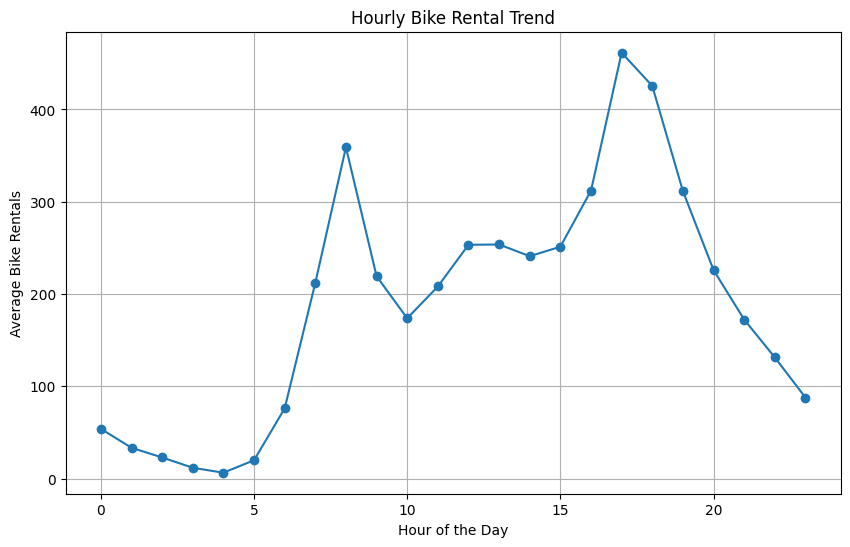

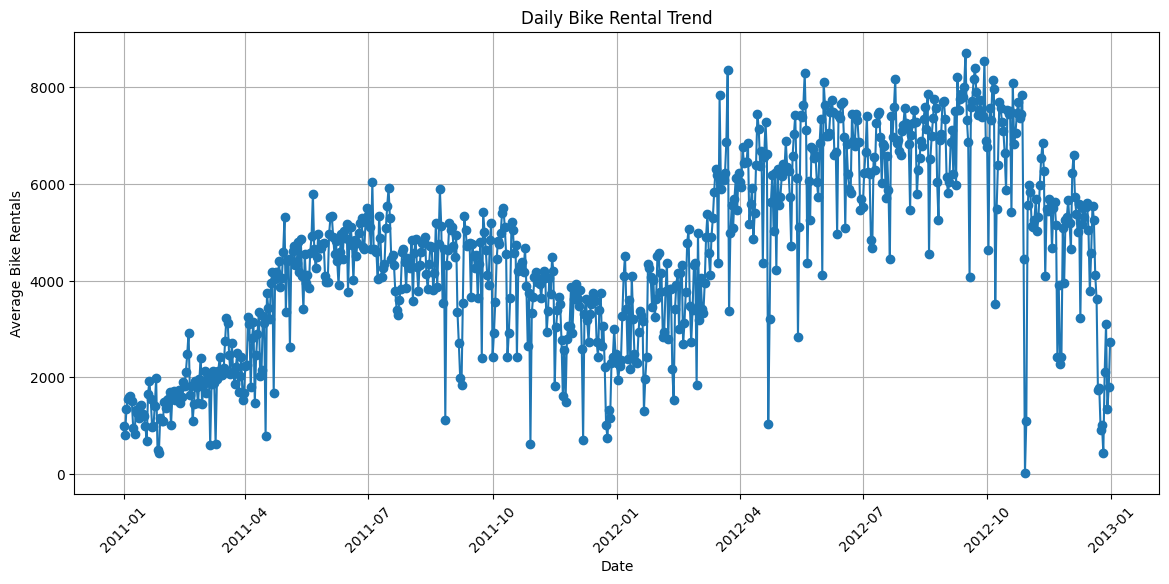

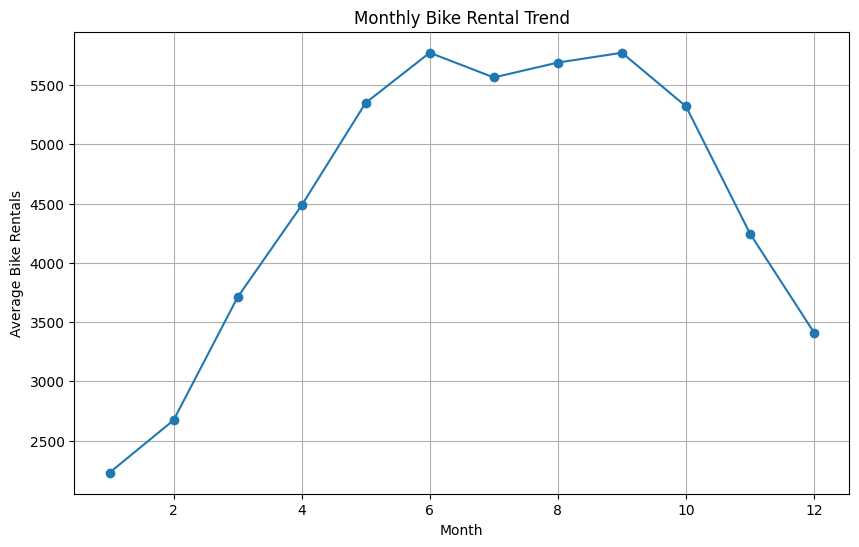

In [29]:
# Hourly trend
hourly_trend = all_data.groupby('hr')['cnt_hour'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o')
plt.title('Hourly Bike Rental Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.grid(True)
plt.show()

# Daily trend
daily_trend = all_data.groupby('dteday')['cnt_day'].mean()
plt.figure(figsize=(14, 6))
plt.plot(daily_trend.index, daily_trend.values, marker='o')
plt.title('Daily Bike Rental Trend')
plt.xlabel('Date')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly trend
monthly_trend = all_data.groupby('mnth_hour')['cnt_day'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Monthly Bike Rental Trend')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.grid(True)
plt.show()


Analyze how bike rentals vary across different seasons.

C:\Users\User\AppData\Local\Temp\ipykernel_9516\2481080152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Mean', data=seasonal_analysis, palette="viridis")


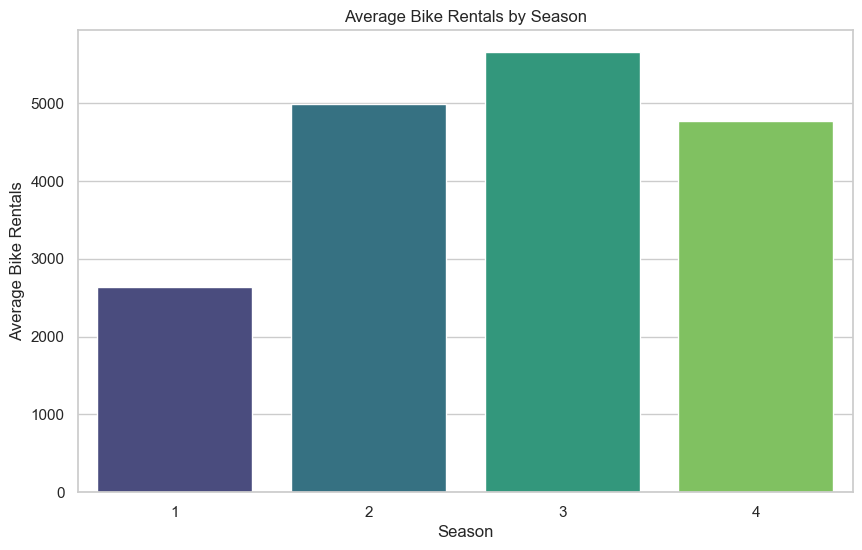

In [30]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for the seasonal analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Mean', data=seasonal_analysis, palette="viridis")
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.show()


RFM Anlysis

In [37]:
# Calculate Recency, Frequency, and Monetary Value
current_date = all_data['dteday'].max()

# Recency
recency = all_data.groupby('registered_hour')['dteday'].max().reset_index()
recency['recency'] = (current_date - recency['dteday']).dt.days
recency = recency[['registered_hour', 'recency']]

# Frequency
frequency = all_data.groupby('registered_hour').size().reset_index(name='frequency')

# Monetary Value
monetary_value = all_data.groupby('registered_hour')['cnt_hour'].sum().reset_index(name='monetary_value')

# Merge the three metrics
rfm_data = pd.merge(recency, frequency, on='registered_hour')
rfm_data = pd.merge(rfm_data, monetary_value, on='registered_hour')

# Display the RFM Dataframe
print("RFM Dataframe:")
print(rfm_data.head(5))


RFM Dataframe:
   registered_hour  recency  frequency  monetary_value
0                0       38         24              35
1                1        0        201             294
2                2        1        245             648
3                3        0        294            1154
4                4        3        307            1602


C:\Users\User\AppData\Local\Temp\ipykernel_9516\612068973.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered_hour", data=rfm_data.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\User\AppData\Local\Temp\ipykernel_9516\612068973.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered_hour", data=rfm_data.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\User\AppData\Local\Temp\ipykernel_9516\612068973.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

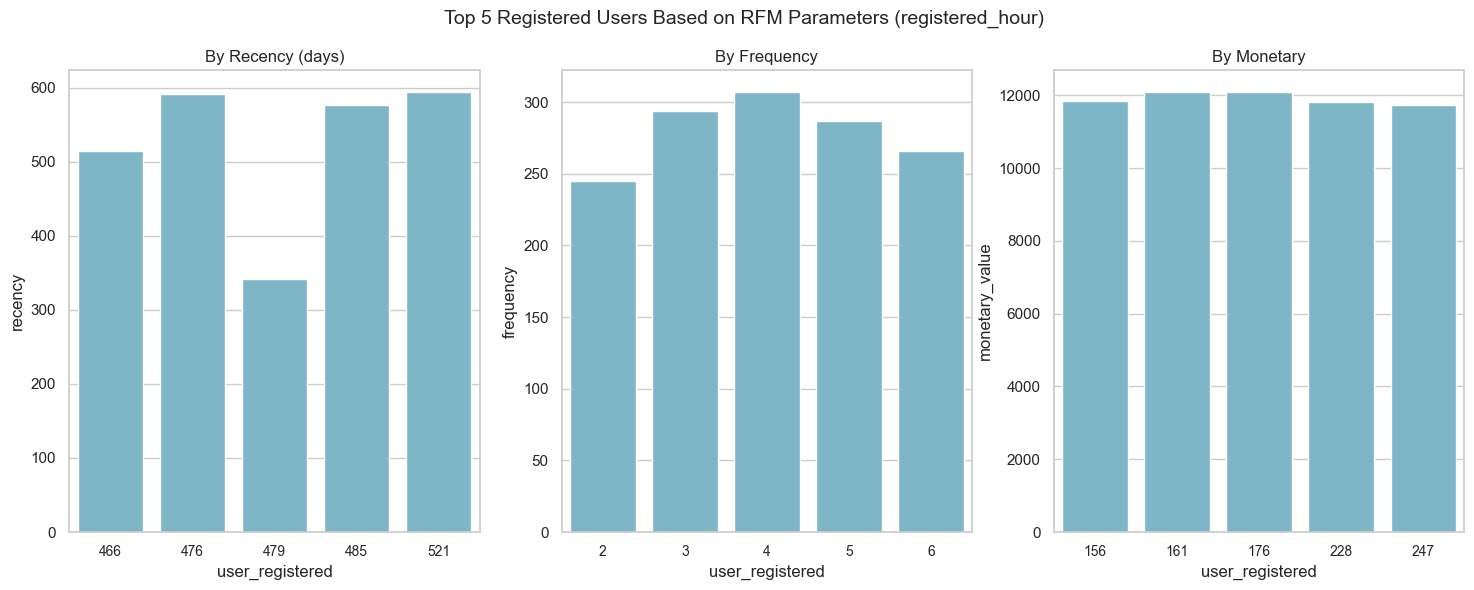

In [39]:
# Plot the RFM Analysis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Set colors
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot bar charts
sns.barplot(y="recency", x="registered_hour", data=rfm_data.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("recency")
ax[0].set_xlabel("user_registered")
ax[0].set_title("By Recency (days)", loc="center", fontsize=12)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="frequency", x="registered_hour", data=rfm_data.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("frequency")
ax[1].set_xlabel("user_registered")
ax[1].set_title("By Frequency", loc="center", fontsize=12)
ax[1].tick_params(axis='x', labelsize=10)

sns.barplot(y="monetary_value", x="registered_hour", data=rfm_data.sort_values(by="monetary_value", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel("monetary_value")
ax[2].set_xlabel("user_registered")
ax[2].set_title("By Monetary", loc="center", fontsize=12)
ax[2].tick_params(axis='x', labelsize=10)

plt.suptitle("Top 5 Registered Users Based on RFM Parameters (registered_hour)", fontsize=14)
plt.show()

## Conclusion

- Bagaimana trends pada bike rentals by month, day, and hour?

--  Trend Bulanan: Peminjaman sepeda menunjukkan pola yang signifikan berdasarkan bulan .
                 Puncak peminjaman terjadi pada bulan-bulan musim panas, seperti musim panas dan musim gugur.

-- Trend Harian: Pada tingkat harian, terlihat pola yang jelas dengan peningkatan peminjaman selama jam-jam puncak.
Peminjaman mencapai puncaknya pada pagi dan sore hari, mencerminkan mobilitas tinggi seiring dengan perjalanan ke dan dari tempat kerja.


-- Trend Jam: Pada tingkat jam, pola harian menunjukkan bahwa sepeda lebih sering dipinjam pada jam-jam puncak perjalanan.
Jam-jam tertentu, seperti pagi hari dan sore hari, menjadi waktu yang paling diminati untuk peminjaman.

- Apakah terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda pada musim tertentu?

-- Berdasarkan tren ini, strategi penempatan sepeda lebih efektif jika ditingkatkan selama musim panas dan musim gugur

- Bagaimana insight dari analisis RFM?

Analisis RFM pada pengguna terdaftar per jam memberikan wawasan yang mendalam tentang preferensi dan kebiasaan pengguna, membantu penyedia layanan untuk mengambil tindakan yang lebih tepat guna dan meningkatkan kualitas layanan secara keseluruhan

Rrecency digunakan untuk mengukur seberapa baru pengguna terdaftar melakukan peminjaman sepeda pada jam tertentu. Semakin rendah nilai "recency," semakin baru pengguna terdaftar melakukan peminjaman sepeda, sementara nilai yang lebih tinggi menunjukkan bahwa peminjaman terakhirnya sudah lebih lama.

Frequency menyajikan seberapa sering pengguna terdaftar melakukan peminjaman sepeda pada jam-jam tertentu. Semakin tinggi nilai "frequency," semakin sering pengguna terdaftar melakukan peminjaman sepeda pada jam tersebut.

Monetary_value mengacu pada nilai total peminjaman sepeda oleh pengguna terdaftar pada jam-jam tertentu.Atribut "cnt_hour" dalam dataset mewakili jumlah total peminjaman sepeda pada setiap jam. Jadi, "monetary_value" adalah hasil dari menjumlahkan nilai-nilai "cnt_hour" untuk setiap kelompok jam tertentu. Ini memberikan gambaran tentang seberapa besar kontribusi finansial dari peminjaman sepeda oleh pengguna terdaftar pada waktu-waktu spesifik.